In [1]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("salary.csv")
d = pd.read_csv("salary.csv")

In [4]:
df

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [5]:
df.drop(["Unnamed: 0"], axis=1,inplace = True)

In [6]:
df["Income"].value_counts()

0    778
1    254
Name: Income, dtype: int64

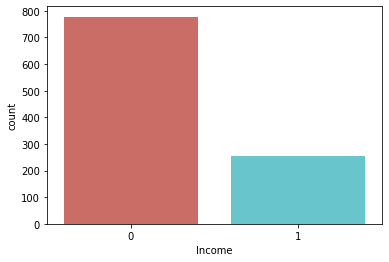

In [7]:
sns.countplot(x='Income',data=df, palette='hls')
plt.show()

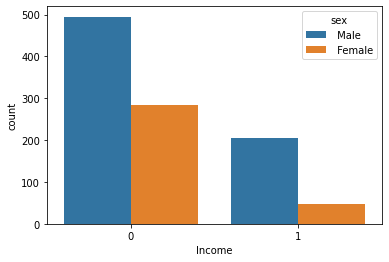

In [8]:
plt.figure()
sns.countplot(data=df,x="Income",hue="sex")
plt.show()

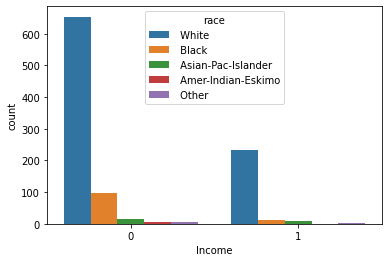

In [9]:
plt.figure()
sns.countplot(data=df,x="Income",hue="race")
plt.show()

#To Check Missing Value:-

In [10]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

# Data Type :

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       1032 non-null   int64
 1   education       1032 non-null   int64
 2   marital-status  1032 non-null   int64
 3   occupation      1032 non-null   int64
 4   relationship    1032 non-null   int64
 5   race            1032 non-null   int64
 6   sex             1032 non-null   int64
 7   native-country  1032 non-null   int64
 8   age             1032 non-null   int64
 9   fnlwgt          1032 non-null   int64
 10  education-num   1032 non-null   int64
 11  capital-gain    1032 non-null   int64
 12  capital-loss    1032 non-null   int64
 13  hours-per-week  1032 non-null   int64
 14  Income          1032 non-null   int64
dtypes: int64(15)
memory usage: 121.1 KB


In [12]:
df_num = df.select_dtypes(["float64","int64"])

In [13]:
df_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
1027,34,290763,9,0,0,40,0
1028,36,51100,10,0,0,40,0
1029,41,227644,9,0,0,50,0
1030,58,205267,13,0,0,40,1


In [14]:
df_cat = df.select_dtypes(object)

In [15]:
df_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
1027,Private,HS-grad,Divorced,Handlers-cleaners,Own-child,White,Female,United-States
1028,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1029,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
1030,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States


In [16]:
le = LabelEncoder()

In [17]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...
1027,2,11,0,5,3,4,0,28
1028,2,15,2,2,0,4,1,28
1029,2,11,2,13,0,4,1,28
1030,1,9,2,9,5,4,0,28


In [19]:
df = pd.concat([df_cat,df_num],axis=1)

In [20]:
df

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2,11,0,5,3,4,0,28,34,290763,9,0,0,40,0
1028,2,15,2,2,0,4,1,28,36,51100,10,0,0,40,0
1029,2,11,2,13,0,4,1,28,41,227644,9,0,0,50,0
1030,1,9,2,9,5,4,0,28,58,205267,13,0,0,40,1


In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,28,39,77516,13,2174,0,40
1,4,9,2,3,0,4,1,28,50,83311,13,0,0,13
2,2,11,0,5,1,4,1,28,38,215646,9,0,0,40
3,2,1,2,5,0,2,1,28,53,234721,7,0,0,40
4,2,9,2,9,5,2,0,4,28,338409,13,0,0,40


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#Logistic Regression :-

In [49]:
log = LogisticRegression(max_iter=120)

In [50]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log.score(X_test,y_test)

0.8

In [52]:
y_pred = log.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [53]:
y_pred = log.predict(X_test)

In [54]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

# Evaluation Matrics :

In [55]:
accuracy_score(y_test,y_pred)

0.8

In [56]:
precision_score(y_test,y_pred)

0.6785714285714286

In [57]:
recall_score(y_test,y_pred)

0.2638888888888889

In [58]:
f1_score(y_test,y_pred)

0.38

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.68      0.26      0.38        72

    accuracy                           0.80       310
   macro avg       0.75      0.61      0.63       310
weighted avg       0.78      0.80      0.76       310

